In [54]:
url = 'https://epistat.sciensano.be/Data/COVID19BE_CASES_AGESEX.json'

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Population Source: https://statbel.fgov.be/en/themes/population/structure-population
pop2020 = [1218255, 6629143, 3645243]
pop2019 = [1208542, 6589069,3633795]
pop = pd.DataFrame(data=pop2020,index=['Brussels','Flanders','Wallonia']).T
pop.columns.name = 'REGION'

# Request data from Sciensano
r = requests.get(url)
data = pd.DataFrame(json.loads(r.text))

# Compute 7-day incidence
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data = data[data.DATE.notna()]
region = data.groupby(['DATE','REGION']).sum().unstack('REGION')
region = region['CASES']

In [58]:
incidence7days = region.rolling(window=7).sum().div(np.array(pop),axis=1)*100000
incidence14days = region.rolling(window=14).sum().div(np.array(pop),axis=1)*100000

In [72]:
last_ten_days = round(pd.concat([incidence7days,incidence14days],keys=['7 days incidence','14 days incidence'],axis=1).tail(10))

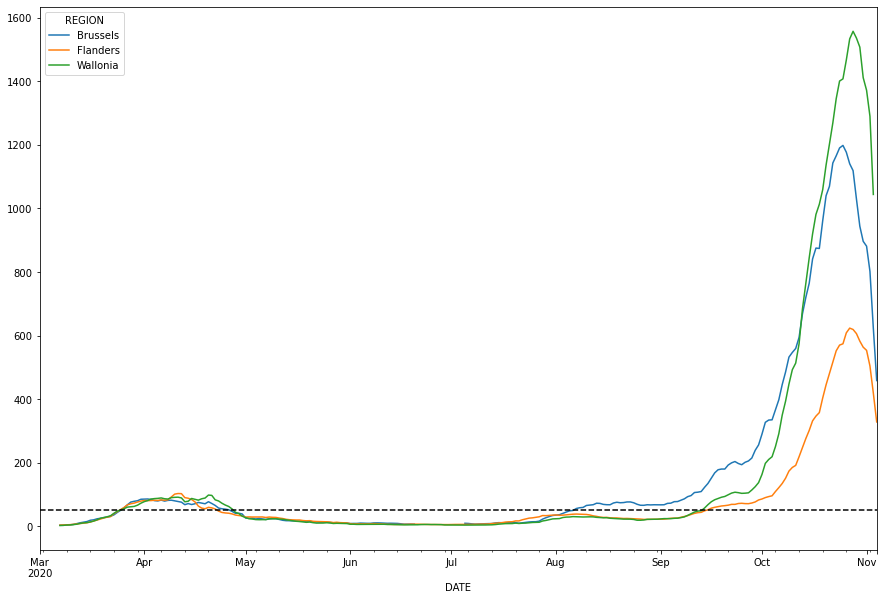

In [76]:
incidence7days.plot(figsize=(15,10))
plt.axhline(50,ls='dashed',c='black')


In [77]:
last_ten_days

7 days incidence                   14 days incidence           \
REGION             Brussels Flanders Wallonia          Brussels Flanders   
DATE                                                                       
2020-10-26           1177.0    608.0   1467.0            2138.0   1012.0   
2020-10-27           1140.0    623.0   1534.0            2180.0   1068.0   
2020-10-28           1119.0    619.0   1557.0            2188.0   1100.0   
2020-10-29           1029.0    606.0   1536.0            2172.0   1123.0   
2020-10-30            944.0    582.0   1507.0            2109.0   1134.0   
2020-10-31            896.0    563.0   1411.0            2087.0   1133.0   
2020-11-01            881.0    553.0   1372.0            2079.0   1127.0   
2020-11-02            802.0    504.0   1290.0            1978.0   1112.0   
2020-11-03            623.0    419.0   1044.0            1764.0   1042.0   
2020-11-04            458.0    328.0      NaN            1577.0    947.0   

                     
REGION     Wallonia  
DATE                 
2020-10-26   2526.0  
2020-10-27   2670.0  
2020-10-28   2759.0  
2020-10-29   2805.0  
2020-10-30   2853.0  
2020-10-31   2812.0  
2020-11-01   2779.0  
2020-11-02   2757.0  
2020-11-03   2577.0  
2020-11-04      NaN